In [19]:
%reset -f 
import importlib
import numpy as np, matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from palettable.colorbrewer.qualitative import Set1_9
import os
from datetime import datetime
from IPython.display import HTML
from matplotlib.patches import Polygon, Circle
import aif_functions as aif


pwd = os.path.abspath('') + "/"
print(pwd)
importlib.reload(aif)

c:\Users\qbr5kx\OneDrive - University of Virginia\Desktop\UVA\PhD Scratch\Active_Epistemic_Inference\particle_filter_robot/


<module 'aif_functions' from 'c:\\Users\\qbr5kx\\OneDrive - University of Virginia\\Desktop\\UVA\\PhD Scratch\\Active_Epistemic_Inference\\particle_filter_robot\\aif_functions.py'>

In [20]:
# Set colors for each agent
cmap = Set1_9.mpl_colors


def init():
    """Initialize the background of the plot."""
    agent_id = 0
    for agent_path in agent_paths:
        agent_path.set_data([], [])
        all_rosbots.append(aif.init_rosbot(ax, color = cmap[agent_id]))
        agent_id += 1
    return agent_paths

# Function to update the plot for each frame
def update(frame, args):
    agent_positions = args['positions'][frame]
    
    # Update plot data for each agent
    for agent_id, agent_path in enumerate(agent_paths):
        xnew, ynew, heading = agent_positions[agent_id]
        aif.update_rosbot(all_rosbots[agent_id], (xnew,ynew), heading, color = cmap[agent_id])
        xdata, ydata = agent_path.get_data()
        xdata = np.append(xdata, xnew)
        ydata = np.append(ydata, ynew)
        agent_path.set_data(xdata, ydata)   
    
    return agent_paths

[0.5 0.5]
[0.0074929343376364255, 0.242904335149083, 0.15210982049528768]
Agents have converged to Goal 0 after 16 iterations.
Final Prior:  [array([0.97232494, 0.02767506]), array([0.97232494, 0.02767506]), array([0.97232494, 0.02767506])]
Image saved as:  c:\Users\qbr5kx\OneDrive - University of Virginia\Desktop\UVA\PhD Scratch\Active_Epistemic_Inference\particle_filter_robot/videos/two_goals_choice20240422-121925.mp4


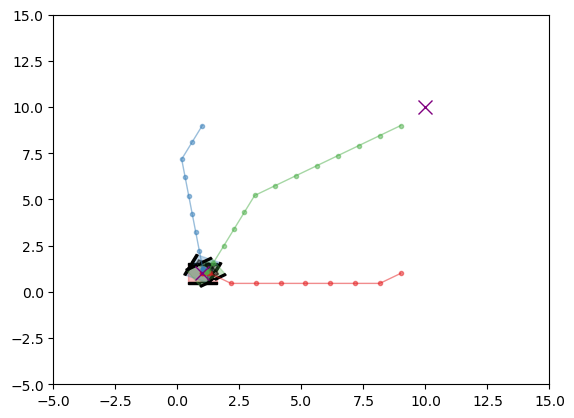

In [23]:

# Re-define the environment and simulation parameters here
args = {}
goals = np.array([[1, 1], [10, 10]], dtype=float)  # Goal positions
args['goals'] = np.copy(goals)
args['agent_positions'] = np.array([[9, 1, 0], [1, 9, 0], [9, 9, 0]], dtype=float)  # Initial agent positions
num_agents = args['agent_positions'].shape[0]  # Number of agents
args['velocity_options'] = [0.0, 0.01, 0.1, 0.5, 1.0]  # Velocity options for the agents
args['num_heading_options'] = 12  # Number of heading options
args['heading_options'] = np.linspace(-np.pi,np.pi,args['num_heading_options'],endpoint=True)  # Heading options for the agents
args['observation_error_std'] = 3.0  # Observation noise standard deviation
max_iterations = 100  # Maximum number of iterations
args['max_distance_measure'] = 10  # Maximum distance measure for likelihood calculation
args['max_heading_measure'] = np.pi  # Maximum heading measure for likelihood calculation

# Initialize plotting objects
fig, ax = plt.subplots()
plt.xlim(-5, 15)
plt.ylim(-5, 15)
agent_paths = [ax.plot([], [], 'o-', markersize=3, linewidth=1, alpha=0.5, color=cmap[i])[0] for i in range(num_agents)]
goal_plots = [ax.plot(goal[0], goal[1], 'x', markersize=10, color='purple')[0] for goal in goals]  # Plot goals
all_rosbots = []  # Dictionary to store all rosbot elements

# Run the simulation
final_positions, goal_converged, num_frames, return_args, prior = aif.run_simulation(args)
print("Final Prior: ", prior)
# Create animation
ani = FuncAnimation(fig, update, frames=range(num_frames), init_func=init, fargs = (return_args,), blit=True, repeat=True)

# Save the animation as a video
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
# HTML(ani.to_jshtml()) # Use an interactive backend for animation

ani.save(pwd + "videos/two_goals_choice" + current_time + ".mp4", writer='ffmpeg', fps=3, dpi=300)
print("Image saved as: ", pwd + "videos/two_goals_choice" + current_time + ".mp4")


In [27]:
distances_to_goals = [np.linalg.norm(goals - pos[:2], axis=1) for pos in final_positions]
goal_reached_by_agents = [np.argmin(distances) for distances in distances_to_goals]
distances_to_selected_goal = [np.min(distances) for distances in distances_to_goals]
print(distances_to_goals)

[array([12.9061436 ,  0.44834153]), array([12.9061436 ,  0.44834153]), array([12.66916488,  0.09438151])]


[0.33333333 0.33333333 0.33333333]
[0.211588224479079, 0.23076827140532188]
Agents have converged to Goal 0 after 18 iterations.
Final Prior:  [array([0.89832014, 0.03911258, 0.06256728]), array([0.89832014, 0.03911258, 0.06256728])]
Image saved as:  c:\Users\qbr5kx\OneDrive - University of Virginia\Desktop\UVA\PhD Scratch\Active_Epistemic_Inference\particle_filter_robot/videos/two_goals_choice20240418-084543.mp4


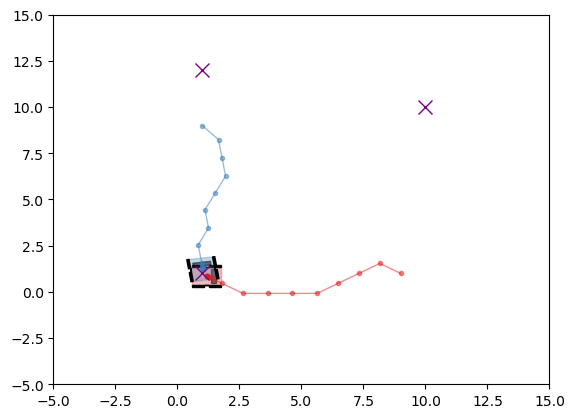

In [7]:
# Re-define the environment and simulation parameters here
args = {}
goals = np.array([[1, 1], [10, 10],[1, 12]], dtype=float)  # Goal positions
args['goals'] = np.copy(goals)
args['agent_positions'] = np.array([[9, 1, 0], [1, 9, 0]], dtype=float)  # Initial agent positions
num_agents = args['agent_positions'].shape[0]  # Number of agents
args['velocity_options'] = [0.0, 0.01, 0.1, 0.5, 1.0]  # Velocity options for the agents
args['num_heading_options'] = 12  # Number of heading options
args['heading_options'] = np.linspace(-np.pi,np.pi,args['num_heading_options'],endpoint=True)  # Heading options for the agents
args['observation_error_std'] = 5.0  # Observation noise standard deviation
max_iterations = 100  # Maximum number of iterations
args['max_distance_measure'] = 10  # Maximum distance measure for likelihood calculation
args['max_heading_measure'] = np.pi  # Maximum heading measure for likelihood calculation

# Initialize figure for plotting
fig, ax = plt.subplots()
plt.xlim(-5, 15)
plt.ylim(-5, 15)
agent_paths = [ax.plot([], [], 'o-', markersize=3, linewidth=1, alpha=0.5, color=cmap[i])[0] for i in range(num_agents)]
goal_plots = [ax.plot(goal[0], goal[1], 'x', markersize=10, color='purple')[0] for goal in goals]  # Plot goals
all_rosbots = []  # Dictionary to store all rosbot elements

# Run the simulation
final_positions, goal_converged, num_frames, return_args, prior = aif.run_simulation(args)
print("Final Prior: ", prior)
# Create animation
ani = FuncAnimation(fig, update, frames=range(num_frames), init_func=init, fargs = (return_args,), blit=True, repeat=True)

# Save the animation as a video
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
# HTML(ani.to_jshtml()) # Use an interactive backend for animation
ani.save(pwd + "videos/three_goals_choice" + current_time + ".mp4", writer='ffmpeg', fps=3, dpi=300)
print("Image saved as: ", pwd + "videos/three_goals_choice" + current_time + ".mp4")